# Airline Passenger Web App Training

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

In [2]:
# data source
airline = pd.read_csv("Data/Passenger_Satisfaction.csv")
df = airline.copy()

## Quick Exploratory Data Analysis (EDA)

In [3]:
# data frame shape
df.shape

(103904, 25)

In [4]:
# data frame info on data types other column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# check for null values
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
# drop the null values at the row level
df.dropna(axis = 0, inplace = True)

In [7]:
# check if the null values were dropped
df.isna().sum().sum()

np.int64(0)

In [8]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103594.0,51950.102274,29997.914016,0.0,25960.25,51955.5,77924.75,103903.0
id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.50,129880.0
Age,103594.0,39.380466,15.113125,7.0,27.00,40.0,51.00,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.00,842.0,1743.00,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.00,3.0,4.00,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.00,3.0,4.00,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.00,3.0,4.00,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.00,3.0,4.00,5.0


In [9]:
# drop the id column since it adds no value for our model training
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)


In [10]:
# first 5 observations
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


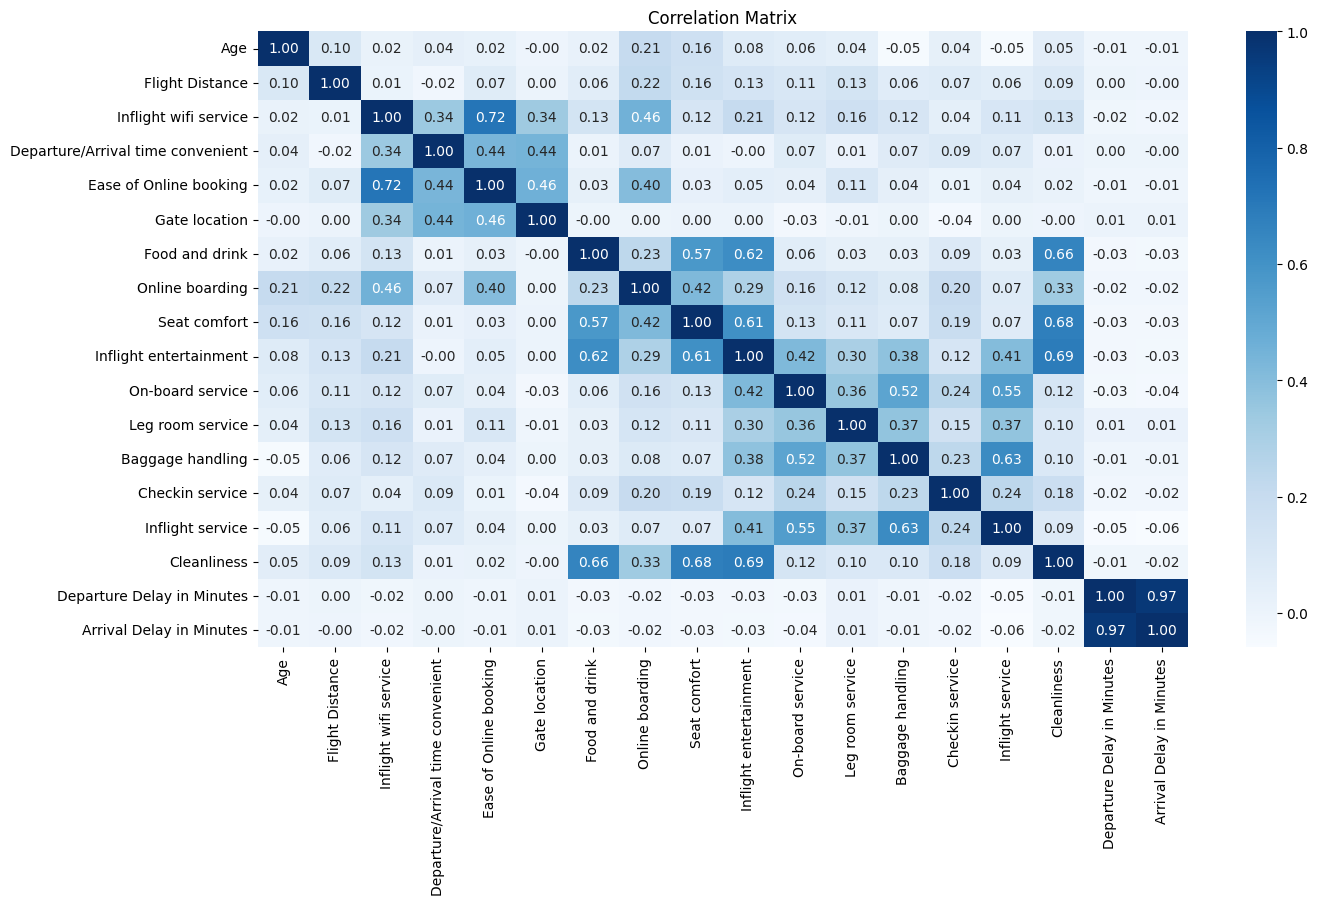

In [12]:
# correlation matrix
corr = df.corr(numeric_only = True)
plt.figure(figsize=(15,8))
plt.title("Correlation Matrix")
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

In [11]:
airline["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)
df["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)

airline["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)
df["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)

C:\Users\peer1\AppData\Local\Temp\ipykernel_520\151741616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)
C:\Users\peer1\AppData\Local\Temp\ipykernel_520\151741616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [12]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business Travel'], dtype=object)

In [13]:
X = df.drop('satisfaction',axis=1)
X.head()
X.to_csv('Clean_data.csv')

## Visualizations

In [15]:
# list our colum names in our data frame
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

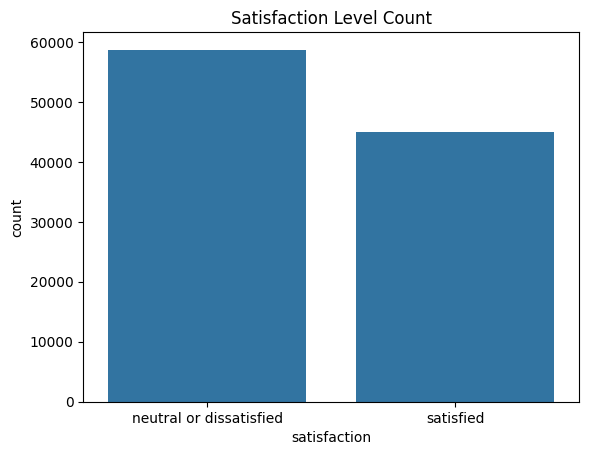

In [16]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "satisfaction", data = df)
plt.title("Satisfaction Level Count")
plt.show()

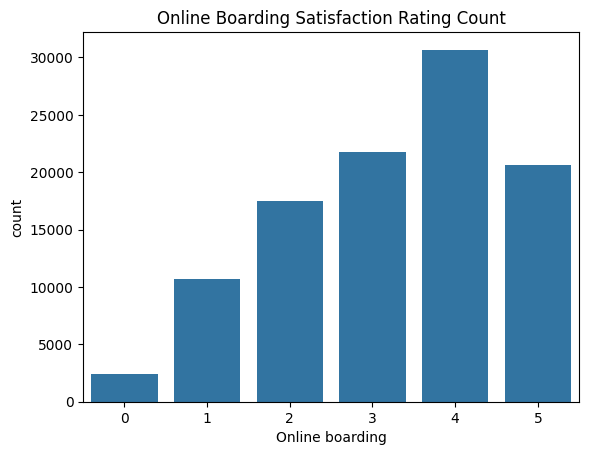

In [17]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "Online boarding", data = df)
plt.title("Online Boarding Satisfaction Rating Count")
plt.show()

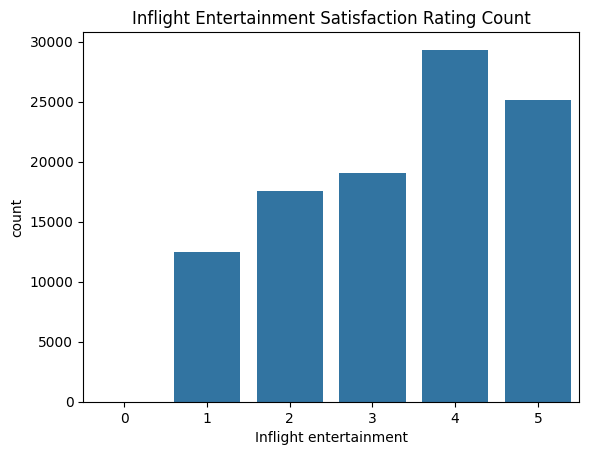

In [18]:
# count plot of classes in Inflight Entertainment ratings
sns.countplot(x = "Inflight entertainment", data = df)
plt.title("Inflight Entertainment Satisfaction Rating Count")
plt.show()

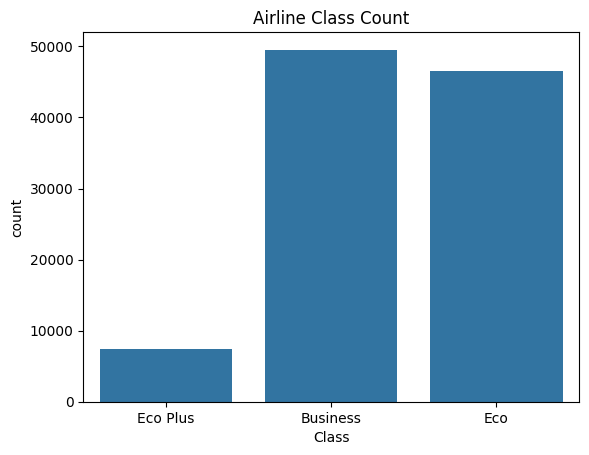

In [19]:
# Airline Class Count
sns.countplot(x = "Class", data = df)
plt.title("Airline Class Count")
plt.show()

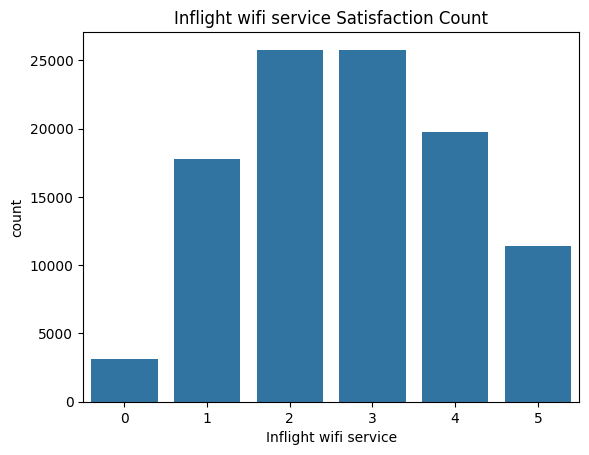

In [20]:
# Inflight wifi service satisfaction rating count 
sns.countplot(x = "Inflight wifi service", data = df)
plt.title("Inflight wifi service Satisfaction Count")
plt.show()

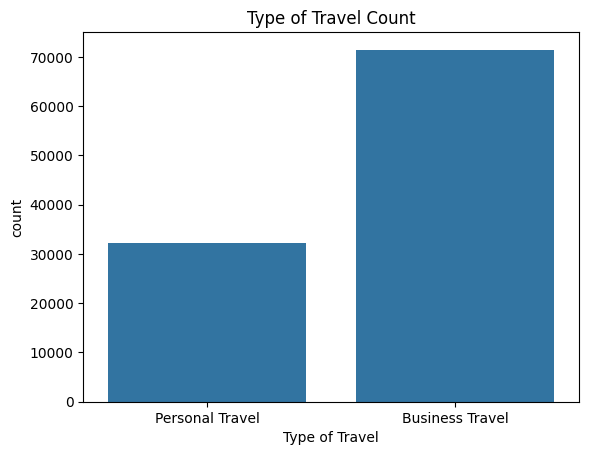

In [21]:
# Type of Travel Count
sns.countplot(x = "Type of Travel", data = df)
plt.title("Type of Travel Count")
plt.show()

## Modeling

In [22]:
# import machine learning tools 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

In [23]:
# column data types
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [24]:
# label encode our categorical columns 

le = LabelEncoder()

cat = ['satisfaction','Gender','Customer Type','Class','Type of Travel']
for name in cat:
  df[name] = le.fit_transform(df[name])


In [25]:
# Now we split our predictors and target variable

# our predictors 
X = df.drop(['satisfaction'], axis = 1)

# our target variable
y = df['satisfaction']

In [35]:
# creating data frame with the top 8 predictors
columns = ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class', 'Inflight entertainment',
            'Seat comfort', 'Ease of Online booking', 'Leg room service', 'Customer Type', 'satisfaction']

df_new = airline[columns]

In [36]:
# column data types
df_new.dtypes 

Online boarding            int64
Inflight wifi service      int64
Type of Travel            object
Class                     object
Inflight entertainment     int64
Seat comfort               int64
Ease of Online booking     int64
Leg room service           int64
Customer Type             object
satisfaction              object
dtype: object

In [38]:
# print the unique values for our categorical values
print(f"satisfaction order is: {df_new['satisfaction'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")


satisfaction order is: ['neutral or dissatisfied' 'satisfied']
Type  of Travel order is: ['Personal Travel' 'Business Travel']
Class order is: ['Eco Plus' 'Business' 'Eco']
Customer Type order is: ['Loyal Customer' 'Disloyal Customer']


The above cell is important after we label encode our categorical variables we know what order the labeling was. 

In [39]:
# label encode our categorical variables again
cat = ['satisfaction','Type of Travel', 'Class', 'Customer Type']

for ct in cat:
  df_new = df_new.copy()
  df_new[ct] = le.fit_transform(df_new[ct])

In [41]:
# print the labeling for our categorical variables
print(f"satisfaction order is: {df_new['satisfaction'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")


satisfaction order is: [0 1]
Type  of Travel order is: [1 0]
Class order is: [2 0 1]
Customer Type order is: [1 0]


In [42]:
df_new.dtypes

Online boarding           int64
Inflight wifi service     int64
Type of Travel            int64
Class                     int64
Inflight entertainment    int64
Seat comfort              int64
Ease of Online booking    int64
Leg room service          int64
Customer Type             int64
satisfaction              int64
dtype: object

In [44]:
# predictors 
X = df_new.drop(['satisfaction'], axis = 1)

# target
y = df_new['satisfaction']

In [45]:
# first 5 observations
df_new.head()

,Online boarding,Inflight wifi service,Type of Travel,Class,Inflight entertainment,Seat comfort,Ease of Online booking,Leg room service,Customer Type,satisfaction
0,3,3,1,2,5,5,3,3,1,0
1,3,3,0,0,1,1,3,5,0,0
2,5,2,0,0,5,5,2,3,1,1
3,2,2,0,0,2,2,5,5,1,0
4,5,3,0,0,3,5,3,4,1,1


In [ ]:
# file_name = "label_encoder.pkl"

# pickle.dump(le,open(file_name,"wb"))

## ML Flow

# Random Forest Classifier

2025/01/05 14:02:10 INFO mlflow.tracking.fluent: Experiment with name 'Customer_Satisfaction_Prediction' does not exist. Creating a new experiment.
2025/01/05 14:02:10 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 14:02:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 14:02:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 14:02:11 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Random Forest - Accuracy: 0.9460083730330591
Random Forest - Precision: 0.9545766590389017
Random Forest - Recall: 0.9200485222761359
Random Forest - F1 Score: 0.9369946091644205
Random Forest - ROC AUC: 0.9858747925075124
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11713
           1       0.95      0.92      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.94     20781
weighted avg       0.95      0.95      0.95     20781



2025/01/05 14:02:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


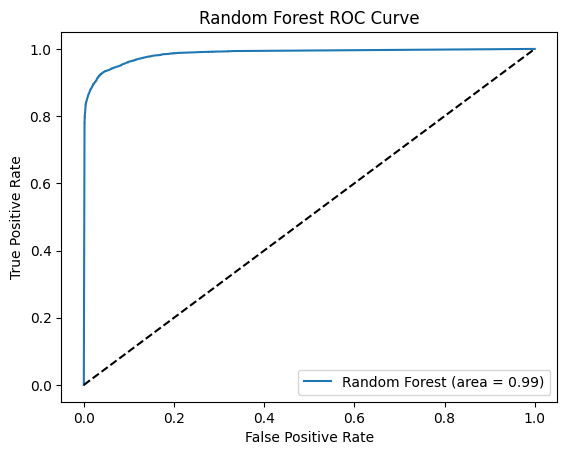

🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/2eb2306682b6452dac5a30491c910bd3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


In [47]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

with mlflow.start_run(run_name="Random Forest"):
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_pred_proba = rfc.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    print(f"Random Forest - Accuracy: {accuracy}")
    print(f"Random Forest - Precision: {precision}")
    print(f"Random Forest - Recall: {recall}")
    print(f"Random Forest - F1 Score: {f1}")
    print(f"Random Forest - ROC AUC: {roc_auc}")
    print(f"Random Forest - Classification Report:\n{classification_report(y_test, y_pred)}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Random Forest")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("ROC AUC", roc_auc)
    
    # Log the model
    mlflow.sklearn.log_model(rfc, "model")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Random Forest (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest ROC Curve")
    plt.legend(loc="best")
    plt.show()


The accuracy of our Random Forest model when only using the top 9 important features returned an accuracy of 95% on unseen data (testing set). 

The accuracy of our Random Forest model when only using the top 9 important features returned an accuracy of 94% on unseen data (testing set). Implying our model is a fairly accurate model despite dropping a certain amount of features. We can probably get away and drop more features but I will leave it using the top 8 features. 

# Logistic Regression

2025/01/05 14:08:01 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 14:08:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 14:08:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 14:08:01 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Logistic Regression - Accuracy: 0.8630960973966604
Logistic Regression - Precision: 0.8537805571347357
Logistic Regression - Recall: 0.8280767534186149
Logistic Regression - F1 Score: 0.8407322398253373
Logistic Regression - ROC AUC: 0.9181970200695045
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.85      0.83      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



2025/01/05 14:08:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


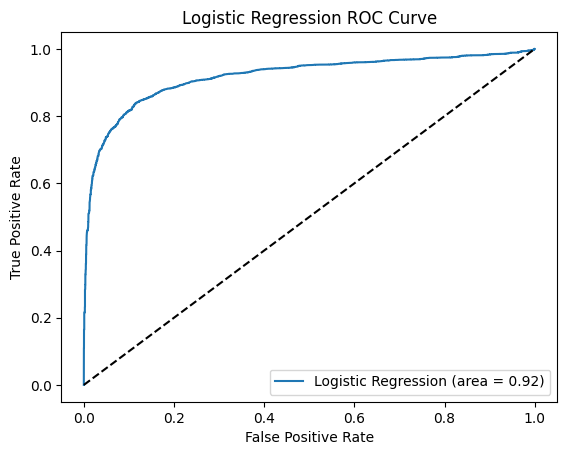

🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/a879250168b54ef4b675d3fba2a8a231
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


In [48]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()

with mlflow.start_run(run_name="Logistic Regression"):
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    print(f"Logistic Regression - Accuracy: {accuracy}")
    print(f"Logistic Regression - Precision: {precision}")
    print(f"Logistic Regression - Recall: {recall}")
    print(f"Logistic Regression - F1 Score: {f1}")
    print(f"Logistic Regression - ROC AUC: {roc_auc}")
    print(f"Logistic Regression - Classification Report:\n{classification_report(y_test, y_pred)}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("ROC AUC", roc_auc)
    
    # Log the model
    mlflow.sklearn.log_model(logreg, "model")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Logistic Regression (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Logistic Regression ROC Curve")
    plt.legend(loc="best")
    plt.show()


# Gradient Boosting Classifier

2025/01/05 14:08:48 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 14:08:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 14:08:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 14:08:49 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Gradient Boosting - Accuracy: 0.9346518454357345
Gradient Boosting - Precision: 0.9388661202185792
Gradient Boosting - Recall: 0.9094618438464932
Gradient Boosting - F1 Score: 0.9239300918664576
Gradient Boosting - ROC AUC: 0.9834457647580791
Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11713
           1       0.94      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



2025/01/05 14:09:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


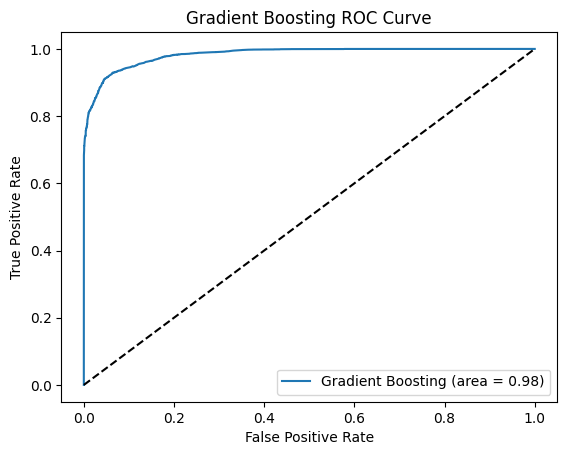

🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/42cc094d6f2243728ccbe2e12bafe7d1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


In [49]:
import mlflow
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

with mlflow.start_run(run_name="Gradient Boosting"):
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    y_pred_proba = gbc.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    print(f"Gradient Boosting - Accuracy: {accuracy}")
    print(f"Gradient Boosting - Precision: {precision}")
    print(f"Gradient Boosting - Recall: {recall}")
    print(f"Gradient Boosting - F1 Score: {f1}")
    print(f"Gradient Boosting - ROC AUC: {roc_auc}")
    print(f"Gradient Boosting - Classification Report:\n{classification_report(y_test, y_pred)}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Gradient Boosting")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("ROC AUC", roc_auc)
    
    # Log the model
    mlflow.sklearn.log_model(gbc, "model")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Gradient Boosting (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Gradient Boosting ROC Curve")
    plt.legend(loc="best")
    plt.show()


# K Neighbors Classifier

2025/01/05 14:10:02 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 14:10:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 14:10:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 14:10:03 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


K-Nearest Neighbors - Accuracy: 0.9381165487705115
K-Nearest Neighbors - Precision: 0.9488924780802953
K-Nearest Neighbors - Recall: 0.9070357300397001
K-Nearest Neighbors - F1 Score: 0.9274921064501579
K-Nearest Neighbors - ROC AUC: 0.9737623661794202
K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11713
           1       0.95      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781



2025/01/05 14:10:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


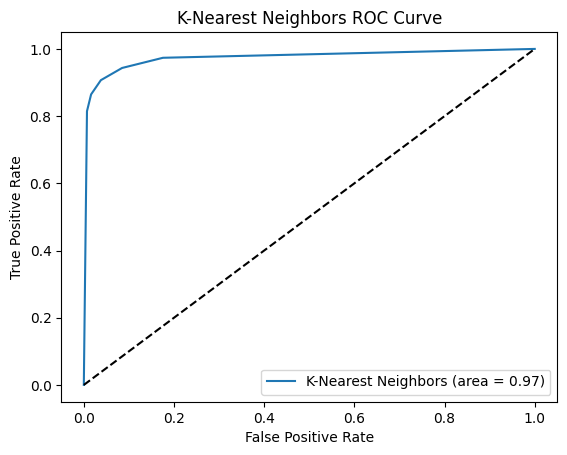

🏃 View run K-Nearest Neighbors at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/b85a3a8027854686beed7c6ccf4d6bed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


In [50]:
import mlflow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

with mlflow.start_run(run_name="K-Nearest Neighbors"):
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    print(f"K-Nearest Neighbors - Accuracy: {accuracy}")
    print(f"K-Nearest Neighbors - Precision: {precision}")
    print(f"K-Nearest Neighbors - Recall: {recall}")
    print(f"K-Nearest Neighbors - F1 Score: {f1}")
    print(f"K-Nearest Neighbors - ROC AUC: {roc_auc}")
    print(f"K-Nearest Neighbors - Classification Report:\n{classification_report(y_test, y_pred)}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "K-Nearest Neighbors")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("ROC AUC", roc_auc)
    
    # Log the model
    mlflow.sklearn.log_model(knn, "model")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"K-Nearest Neighbors (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("K-Nearest Neighbors ROC Curve")
    plt.legend(loc="best")
    plt.show()


# DecisionTreeClassifier

2025/01/05 14:11:17 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 14:11:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 14:11:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 14:11:17 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Decision Tree - Accuracy: 0.9436985708098744
Decision Tree - Precision: 0.9525555810222324
Decision Tree - Recall: 0.9166299073665637
Decision Tree - F1 Score: 0.9342474991570192
Decision Tree - ROC AUC: 0.9754547972458939
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



2025/01/05 14:11:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


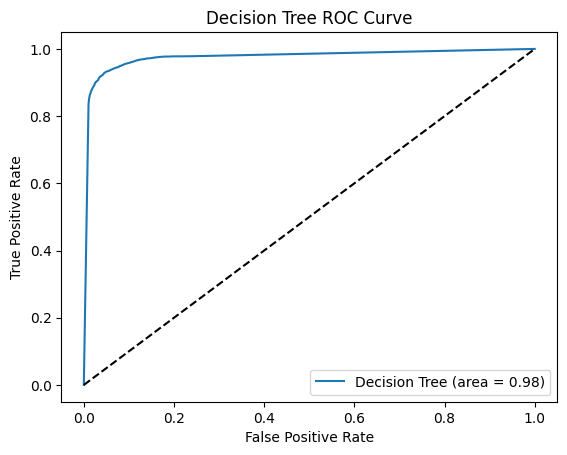

🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/71e4c18234f04489af7d93de2e828f3b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


In [51]:
import mlflow
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis = 1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

with mlflow.start_run(run_name="Decision Tree"):
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    y_pred_proba = dtc.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    print(f"Decision Tree - Accuracy: {accuracy}")
    print(f"Decision Tree - Precision: {precision}")
    print(f"Decision Tree - Recall: {recall}")
    print(f"Decision Tree - F1 Score: {f1}")
    print(f"Decision Tree - ROC AUC: {roc_auc}")
    print(f"Decision Tree - Classification Report:\n{classification_report(y_test, y_pred)}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Decision Tree")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("ROC AUC", roc_auc)
    
    # Log the model
    mlflow.sklearn.log_model(dtc, "model")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"Decision Tree (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Decision Tree ROC Curve")
    plt.legend(loc="best")
    plt.show()


The accuracy of our Random Forest model when only using the top 9 important features returned an accuracy of 95% on unseen data (testing set). 

# Model Registration

In [53]:
model_name = "Random Forest Classifier"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Successfully registered model 'Random Forest Classifier'.
2025/01/05 14:27:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 1


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/2eb2306682b6452dac5a30491c910bd3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329


Created version '1' of model 'Random Forest Classifier'.


In [54]:
model_name = "Logistic Regression"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Successfully registered model 'Logistic Regression'.
2025/01/05 14:28:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/357554300831934329/runs/a879250168b54ef4b675d3fba2a8a231
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/357554300831934329
